# Cassini Example


See the spiceypy reference doc lists all the relevant functions and their usage:

https://spiceypy.readthedocs.io/en/master/documentation.html

Once you find the function, click on the SPICE documentation linked and look at the examples.

All images come from the file: $TOOLKIT/doc/html/lessons/remote_sensing/remote_sensing_diagram.pdf

In [1]:
import numpy as np

import spiceypy as spice

In [2]:
# Load meta-kernel
spice.furnsh('cassini.tm')

## Time Conversion

Write a program that prompts the user for an input UTC time string, converts it to the following time systems and output formats:

1. Ephemeris Time (ET) in seconds past J2000
2. Calendar Ephemeris Time
3. Spacecraft Clock Time

Note: Because this is an interactive notebook, I do not prompt the user for a time string.

Relevant links:

http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/str2et_c.html
http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/etcal_c.html http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/sce2c_c.html

In [3]:
# This is the time used in all examples
utc_time = '2004 jun 11 19:32:00'

In [4]:
# Convert the input time string into ephemeris time expressed as seconds past J2000 TDB. 
# Display the result.
et_time = spice.str2et(utc_time)
print('Ephemeris time: ', et_time)

Ephemeris time:  140254384.1846252


In [5]:
# Convert ephemeris time into a calendar format. Display the result
cal_time = spice.etcal(et_time)
print('Calendar format: ', cal_time)

Calendar format:  2004 JUN 11 19:33:04.184


In [6]:
# Convert ephemeris time into a spacecraft clock string. Display the result.
SCLKID = -82 # from the sclk kernel
sclk_time = spice.sce2c(SCLKID, et_time)
print('Spacecraft clock time: ', sclk_time)

Spacecraft clock time:  197491442025.3071


## Obtaining Target States and Positions

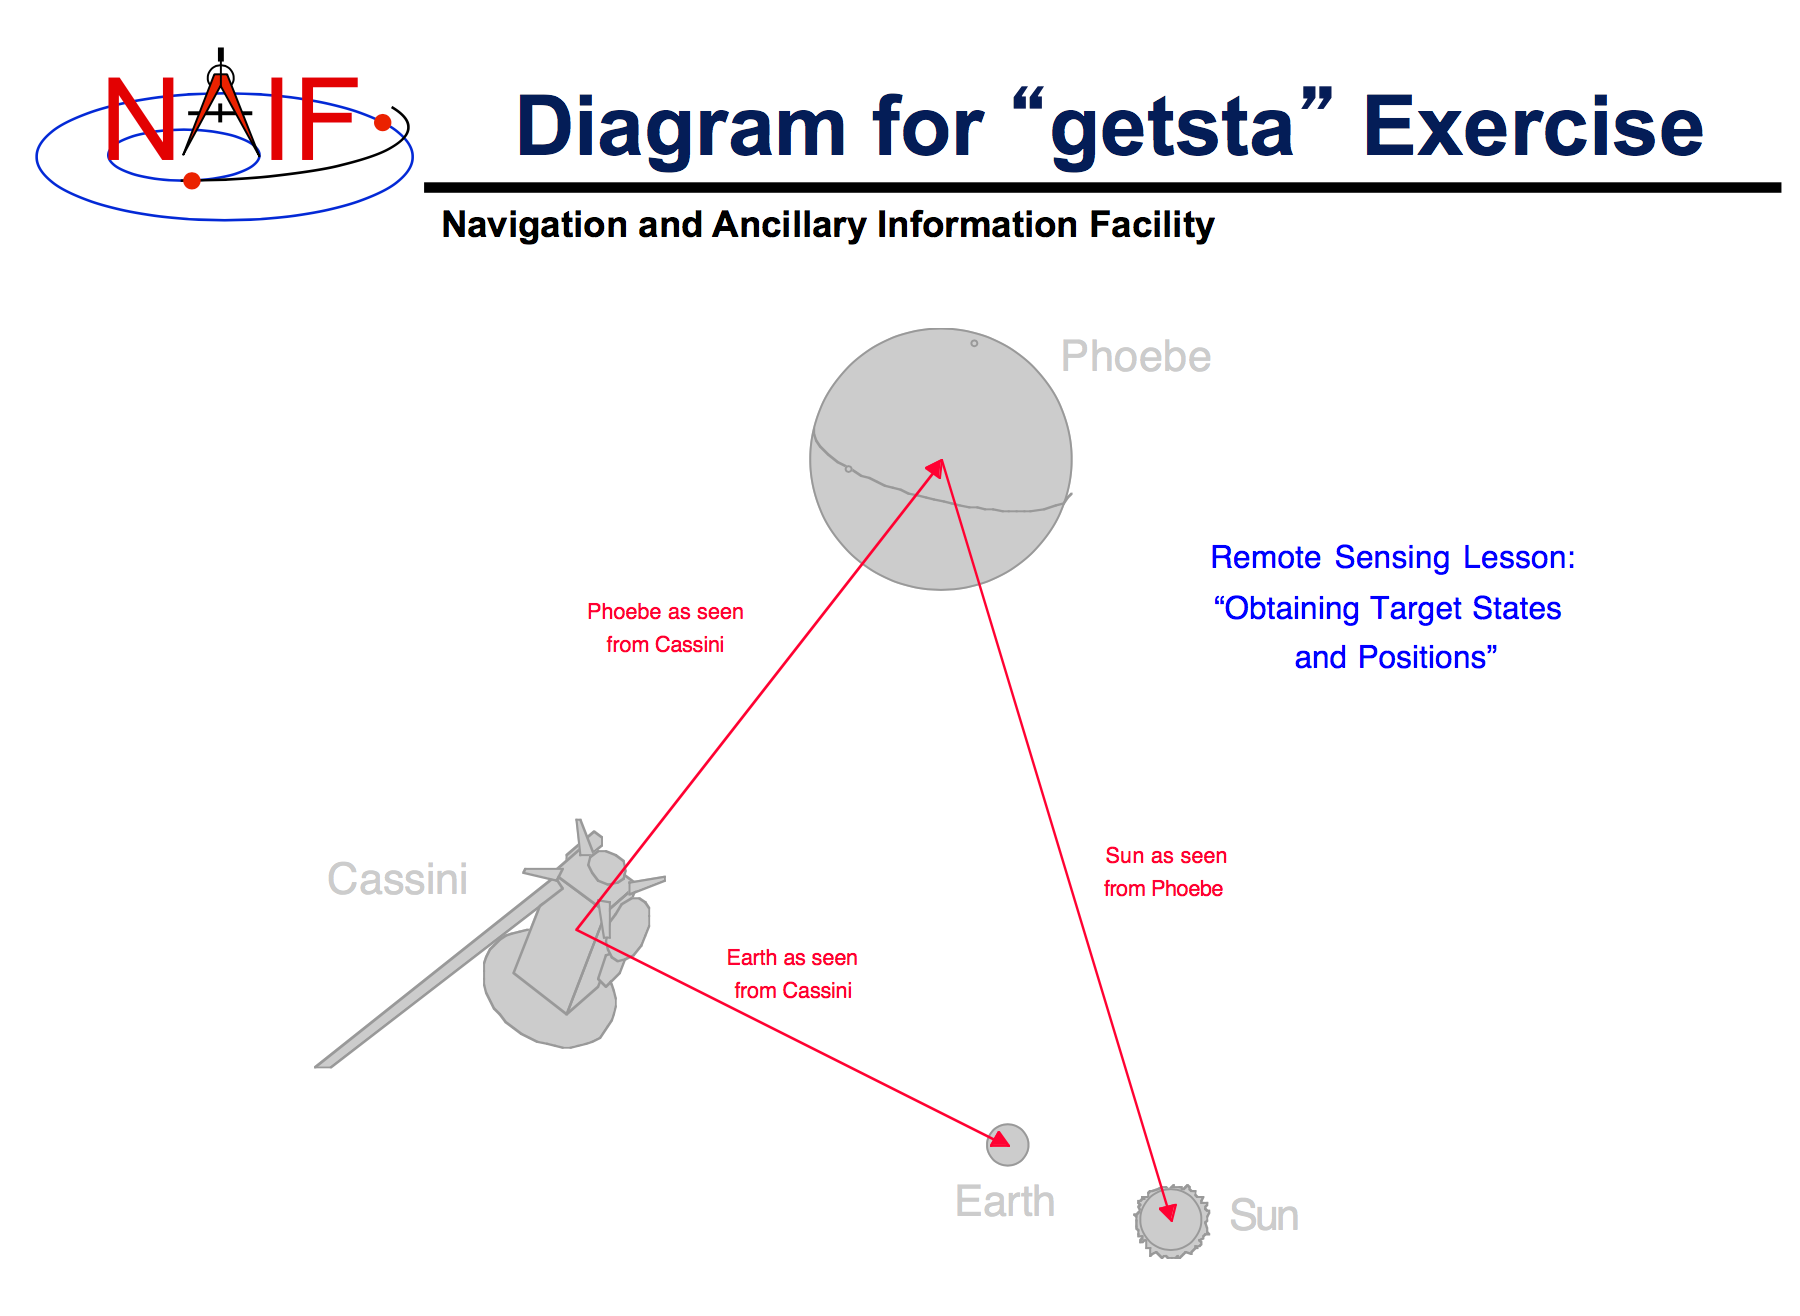

1. The apparent state of Phoebe as seen from CASSINI in the J2000
frame, in kilometers and kilometers/second. This vector itself
is not of any particular interest, but it is a useful
intermediate quantity in some geometry calculations.
2. The apparent position of the Earth as seen from CASSINI in the
J2000 frame, in kilometers.
3. The one-way light time between CASSINI and the apparent
position of Earth, in seconds.
4. The apparent position of the Sun as seen from Phoebe in the
J2000 frame (J2000), in kilometers.
5. The actual (geometric) distance between the Sun and Phoebe, in
astronomical units.

To find NAIF IDs: https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/FORTRAN/req/naif_ids.html

Relevant links:

http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/spkezr_c.html
http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/vnorm_c.html
http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/convrt_c.html

In [7]:
# The apparent state of Phoebe as seen from CASSINI in the J2000 frame, in kilometers 
# and kilometers/second. This vector itself is not of any particular interest, but it 
# is a useful intermediate quantity in some geometry calculations.
[phoebe_state, phoebe_lt] = spice.spkezr('PHOEBE', et_time, 'J2000', 'LT+S', 'CASSINI')
print('Phoebe state (x, y, z) [km]: ', phoebe_state[:3])
print('Phoebe state (vx, vy, vz) [km/s]: ', phoebe_state[3:])

Phoebe state (x, y, z) [km]:  [-119.92092897 2194.13933986  -57.63897986]
Phoebe state (vx, vy, vz) [km/s]:  [-5.98023114 -2.11880531 -0.29482213]


In [8]:
# The apparent position of the Earth as seen from CASSINI in the J2000 frame, in kilometers.
# Earth NAIF ID: 399, Cassini NAIF ID: -82
[earth_pos, earth_lt] = spice.spkezp(399, et_time, 'J2000', 'LT+S', -82)
print('Earth position (x, y, z) [km]: ', earth_pos)

# The one-way light time between CASSINI and the apparent position of Earth, in seconds.
print('Light time [s]: ', earth_lt)

Earth position (x, y, z) [km]:  [ 3.53019393e+08 -1.32818035e+09 -5.68134172e+08]
Light time [s]:  4960.426912028222


In [9]:
# The apparent position of the Sun as seen from Phoebe in the J2000 frame (J2000), 
# in kilometers.
# Sun NAIF ID: 10, Phoebe NAIF ID: 609
[sun_pos, sun_lt] = spice.spkezp(10, et_time, 'J2000', 'LT+S', 609)
print('Sun position (x, y, z) [km]: ', sun_pos)

Sun position (x, y, z) [km]:  [ 3.76551465e+08 -1.19049563e+09 -5.08438699e+08]


In [10]:
# The actual (geometric) distance between the Sun and Phoebe, in astronomical units.
sun_dist = spice.vnorm(sun_pos)
sun_dist_au = spice.convrt(sun_dist, 'KM', 'AU')
print('Sun-Phoebe distance in AU: ', sun_dist_au)

Sun-Phoebe distance in AU:  9.012005475539208


## Spacecraft Orientation and Reference Frames

![](files/xform.png)

Write a program that prompts the user for an input time string, computes and displays the following at the epoch of interest:
1. The apparent state of Phoebe as seen from CASSINI in the IAU_PHOEBE body-fixed frame. This vector itself is not of any particular interest, but it is a useful intermediate quantity in some geometry calculations.
2. The angular separation between the apparent position of Earth as seen from CASSINI and the nominal boresight of the CASSINI high gain antenna (HGA). The HGA boresight direction is provided by the kernel variable TKFRAME_-82101_BORESIGHT, which is defined in the Cassini frame kernel cited above in the section "Kernels Used." In this kernel, the HGA boresight vector is expressed relative to the CASSINI_HGA reference frame.

Relevant links:

http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/spkpos_c.html
http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/vsep_c.html

In [11]:
# The apparent state of Phoebe as seen from CASSINI in the IAU_PHOEBE body-fixed frame. 
# This vector itself is not of any particular interest, but it is a useful intermediate 
# quantity in some geometry calculations.
[phoebe_state_iau, phoebe_lt_iau] = spice.spkezr('PHOEBE', et_time, 'IAU_PHOEBE', 
                                                 'LT+S', 'CASSINI')
print('Phoebe state (x, y, z) [km]: ', phoebe_state_iau[:3])
print('Phoebe state (vx, vy, vz) [km/s]: ', phoebe_state_iau[3:])

Phoebe state (x, y, z) [km]:  [-1982.63976162  -934.53047112  -166.56259513]
Phoebe state (vx, vy, vz) [km/s]:  [ 3.97083213 -3.81249566 -2.37166299]


In [12]:
# Apparent position of Earth as seen from CASSINI in CASSINI_HGA frame
[earth_pos, earth_ltime] = spice.spkpos('EARTH', et_time, 'CASSINI_HGA', 'LT+S', 'CASSINI')
boresight_pos = [0.0, 0.0, 1.0]
print('Earth position (x, y, z) [km]: ', earth_pos)

Earth position (x, y, z) [km]:  [4.97510258e+08 1.32327091e+09 4.61410682e+08]


In [13]:
# Angular separation
earth_bore_sep = spice.vsep(earth_pos, boresight_pos)
print('Angular separataion in radians: ', earth_bore_sep)

Angular separataion in radians:  1.2553132026561336


In [14]:
# Convert from radians to degrees
earth_bore_deg = spice.convrt(earth_bore_sep, 'RADIANS', 'DEGREES')
print('Angular separataion in degrees: ', earth_bore_deg)

Angular separataion in degrees:  71.92414847924705


### Extra Credit Section

1.   Run the original program using the input UTC time "2004 jun 11
     18:25:00". Explain what happens.     
2.   Compute the angular separation between the apparent position of
     the Sun as seen from CASSINI and the nominal boresight of the
     CASSINI high gain antenna (HGA). Is the HGA illuminated?
     
Note: My code differs from the example code because I'm working in the HGA frame directly.
Skipping Question 1 because I don't get the same error.

In [15]:
# Question 2: Compute the angular separation between the apparent position of the Sun as 
# seen from CASSINI and the nominal boresight of the CASSINI high gain antenna (HGA). 
# Is the HGA illuminated?
[sun_pos, sun_ltime] = spice.spkpos('SUN', et_time, 'CASSINI_HGA', 'LT+S', 'CASSINI')
boresight_pos = [0.0, 0.0, 1.0]
print('Sun position (x, y, z) [km]: ', sun_pos)
sun_bore_sep = spice.vsep(sun_pos, boresight_pos)
print('Angular separataion in radians: ', sun_bore_sep)
sun_bore_deg = spice.convrt(sun_bore_sep, 'RADIANS', 'DEGREES')
print('Angular separataion in degrees: ', sun_bore_deg)

# If angle is less than 90 degrees, HGA is illuminated
if sun_bore_deg < 90.:
    print('HGA illuminated')
else:
    print('HGA not illuminated')

Sun position (x, y, z) [km]:  [5.01742127e+08 1.18859401e+09 3.91247524e+08]
Angular separataion in radians:  1.2763549411321429
Angular separataion in degrees:  73.12975128754043
HGA illuminated


## Computing Sub-s/c and Sub-solar Points on an Ellipsoid and a DSK

<img src="files\phoebe.png" width="700" align="left">
<img src="files\subpts.png" width="700" align="left">

1. The apparent sub-observer point of CASSINI on Phoebe, in the body fixed frame IAU_PHOEBE, in kilometers.
2. The apparent sub-solar point on Phoebe, as seen from CASSINI in the body fixed frame IAU_PHOEBE, in kilometers.

Relevant links:

https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/subpnt_c.html
https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/subslr_c.html

In [16]:
# The apparent sub-observer point of CASSINI on Phoebe, in the body fixed frame IAU_PHOEBE, 
# in kilometers. Using near point/ellipsoid.
[subobs_point, subobs_epoch, subobs_vec] = spice.subpnt('near point/ellipsoid', 'PHOEBE', 
                                                        et_time,'IAU_PHOEBE', 'LT+S', 
                                                        'CASSINI')
print('Sub-observer point (x, y, z) [km]: ', subobs_point)

Sub-observer point (x, y, z) [km]:  [104.49789074  45.26884577   7.38331473]


In [17]:
# The apparent sub-solar point on Phoebe, as seen from CASSINI in the body fixed frame 
# IAU_PHOEBE, in kilometers. Using near point/ellipsoid.
[subsol_point, subsol_epoch, subsol_vec] = spice.subslr('near point/ellipsoid', 'PHOEBE', 
                                                        et_time,'IAU_PHOEBE', 'LT+S', 
                                                        'CASSINI')
print('Sub-solar point (x, y, z) [km]: ', subsol_point)

Sub-solar point (x, y, z) [km]:  [ 78.68071625  76.8786516  -21.88456729]


In [18]:
# The apparent sub-observer point of CASSINI on Phoebe, in the body fixed frame IAU_PHOEBE, 
# in kilometers. Using NADIR/DSK/Unprioritized.
[subobs_point_dsk, subobs_epoch_dsk, subobs_vec_dsk] = spice.subpnt('NADIR/DSK/Unprioritized', 
                                                'PHOEBE', et_time,'IAU_PHOEBE', 'LT+S', 
                                                'CASSINI')
print('Sub-observer point (x, y, z) [km]: ', subobs_point_dsk)

Sub-observer point (x, y, z) [km]:  [95.37257468 40.94817689  6.6099027 ]


In [19]:
# The apparent sub-solar point on Phoebe, as seen from CASSINI in the body fixed frame 
# IAU_PHOEBE, in kilometers. Using NADIR/DSK/Unprioritized.
[subsol_point_dsk, subsol_epoch_dsk, subsol_vec_dsk] = spice.subslr('NADIR/DSK/Unprioritized', 
                                                'PHOEBE', et_time,'IAU_PHOEBE', 'LT+S', 
                                                'CASSINI')
print('Sub-solar point (x, y, z) [km]: ', subsol_point_dsk)

Sub-solar point (x, y, z) [km]:  [ 79.11113709  77.33831624 -22.02817575]


### Extra Credit

1.   Recompute the apparent sub-solar point on Phoebe as seen from
     CASSINI in the body fixed frame IAU_PHOEBE in kilometers using
     the 'Intercept/ellipsoid' method at "2004 jun 11 19:32:00".
     Explain the differences.

2.   Compute the geometric sub-spacecraft point of CASSINI on Phoebe
     in the body fixed frame IAU_PHOEBE in kilometers using the
     'Near point/ellipsoid' method at "2004 jun 11 19:32:00".

3.   Transform the sub-spacecraft Cartesian coordinates obtained in
     the previous task to planetocentric and planetographic
     coordinates. When computing planetographic coordinates,
     retrieve Phoebe's radii by calling spiceypy.bodvrd and use the
     first element of the returned radii values as Phoebe's
     equatorial radius. Explain why planetocentric and
     planetographic latitudes and longitudes are different. Explain
     why the planetographic altitude for a point on the surface of
     Phoebe is not zero and whether this is correct or not.
     
Relevant links:

http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/bodvar_c.html
http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/recpgr_c.html
http://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/reclat_c.html

In [20]:
# Question 1
[subsol_point, subsol_epoch, subsol_vec] = spice.subslr('Intercept/ellipsoid', 'PHOEBE', 
                                                        et_time,'IAU_PHOEBE', 'LT+S', 
                                                        'CASSINI')
print('Sub-solar point (x, y, z) [km]: ', subsol_point)

Sub-solar point (x, y, z) [km]:  [ 74.54229301  79.60686275 -24.87078456]


Compared to answer above...

With 'near point/ellipsoid':
Sub-solar point (x, y, z) [km]:  [ 78.68071625  76.8786516  -21.88456729]

With 'Intercept/ellipsoid':
Sub-solar point (x, y, z) [km]:  [ 74.54229301  79.60686275 -24.87078456]

The difference is due to the different methods. 

Near-point ellipsoid:
The sub-solar point computation uses a triaxial 
ellipsoid to model the surface of the target body. 
The sub-solar point is defined as the nearest 
point on the target relative to the sun. 

Intercept ellipsoid:
The sub-solar point computation uses a triaxial 
ellipsoid to model the surface of the target body. 
The sub-solar point is defined as the target 
surface intercept of the line containing the sun 
and the target's center. 

In [21]:
# Compute the geometric sub-spacecraft point of CASSINI on Phoebe in the body fixed frame 
# IAU_PHOEBE in kilometers using the 'Near point/ellipsoid' method at "2004 jun 11 19:32:00".
[subsc_point, subsc_epoch, subsc_vec] = spice.subpnt('near point/ellipsoid', 'PHOEBE', 
                                                        et_time,'IAU_PHOEBE', 'LT+S', 
                                                        'CASSINI')
print('Sub-spacecraft point (x, y, z) [km]: ', subsc_point)

Sub-spacecraft point (x, y, z) [km]:  [104.49789074  45.26884577   7.38331473]


In [22]:
# Transform the sub-spacecraft Cartesian coordinates obtained in the previous task to 
# planetocentric and planetographic coordinates. When computing planetographic coordinates, 
# retrieve Phoebe's radii by calling spiceypy.bodvrd and use the first element of the 
# returned radii values as Phoebe's equatorial radius. Explain why planetocentric and 
# planetographic latitudes and longitudes are different. Explain why the planetographic 
# altitude for a point on the surface of Phoebe is not zero and whether this is correct or 
# not.

# Get Phoebe radius (this is based on the example in subpnt)
r_phoebe = spice.bodvrd('PHOEBE', 'RADII', 3)
re = r_phoebe[1][0] # equatorial
rp = r_phoebe[1][2] # polar
f  = ( re - rp ) / re

# Convert to planetographic coordinates
pg_coord = spice.recpgr('PHOEBE', subsc_point, re, f)
print('Planetographic coordinates (rad, rad, km)', pg_coord)

# Need to match units...
pg_coord_lat = spice.convrt(pg_coord[1], 'RADIANS', 'DEGREES')
pg_coord_lon = spice.convrt(pg_coord[0], 'RADIANS', 'DEGREES')
pg_coord_alt = pg_coord[2]

print('Planetographic LAT (deg): ', pg_coord_lat)
print('Planetographic LON (deg): ', pg_coord_lon)
print('Planetographic ALT (km): ', pg_coord_alt)

Planetographic coordinates (rad, rad, km) (5.874386841488254, 0.0777264826429562, -0.8309852175995872)
Planetographic LAT (deg):  4.453399411838238
Planetographic LON (deg):  336.57757324446305
Planetographic ALT (km):  -0.8309852175995872


In [23]:
# Convert to planetocentric coordinates
pc_coord = spice.reclat(subsc_point)

# Convert to correct units
pc_coord_lon = spice.convrt(pc_coord[1], 'RADIANS', 'DEGREES')
pc_coord_lat = spice.convrt(pc_coord[2], 'RADIANS', 'DEGREES')

print('Planetocentric LAT (deg): ', pc_coord_lat)
print('Planetocentric LON (deg): ', pc_coord_lon)
print('Planetocentric R (km): ', pc_coord[0])

Planetocentric LAT (deg):  3.7094718608660378
Planetocentric LON (deg):  23.42242675553693
Planetocentric R (km):  114.12094857082563


Longitude: Planetographic = 360 - planetocentric

## Intersecting Vectors with an Ellipsoid and a DSK

<img src="files\fovint.png" width="700" align="left">
<img src="files\cosmographia.png" width="700" align="left">

Write a program that prompts the user for an input UTC time string and, for that time, computes the intersection of the CASSINI ISS NAC camera boresight and field of view (FOV) boundary vectors with the surface of Phoebe. Compute each intercept twice: once with Phoebe’s shape modeled as an ellipsoid, and once with Phoebe’s shape modeled by DSK data. The program presents each point of intersection as:
1. A Cartesian vector in the IAU_PHOEBE frame
2. Planetocentric (latitudinal) coordinates in the IAU_PHOEBE frame.

For each of the camera FOV boundary and boresight vectors, if an intersection is found, the program displays the results of the above computations, otherwise it indicates no intersection exists. At each point of intersection compute the following:
3. Phase angle
4. Solar incidence angle
5. Emission angle

These angles should be computed using both ellipsoidal and DSK shape models. Additionally compute the local solar time at the intercept of the camera boresight with the surface of Phoebe, using both ellipsoidal and DSK shape models.